# SENTIMENT ANALYSIS (NAIVE BAYES CLASSIFIER)

## Library Python yang Digunakan
1. pandas
2. matplotlib
3. sastrawi
4. wordcloud
    Menggambarkan metadata kumpulan kata kunci atau keywords pada sebuah dokumen.
    
    alternatif lain : Tweepy, TextBlob, Pandas, Re (regex), Time, Json, serta Matplotlib.
5. numpy
    melakukan operasi komputasi untuk tipe data numerik seperti tipe data operasi aritmatika atau operasi lainnya yang bisa diterapkan pada vektor atau matriks
6. sklearn:

    -naive bayes (GaussianNB)

    -model selection (RepeatedStratifiedKFold, GridSearchCV, StratifiedKFold)
    
    -metrics (confusion_matrix, classification_report)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import Sastrawi
from wordcloud import WordCloud
import numpy as np

## A. Crawling Data

In [ ]:
df = pd.read_csv('data_real.csv', index_col=0)
df.head()

,Unnamed: 0.1,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,Pesanan gx sesuai dgn yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,Pengiriman dan respon super cepat. Tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"Php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


In [ ]:
df_copy = df.copy()

## B. Labeling

In [ ]:
label = []
for index, row in df_copy.iterrows():
  if row["Rating"] == 1 or row["Rating"] == 2:
    label.append(0)
  else :
    label.append(1)

df_copy["label"] = label

In [ ]:
df_copy.head()

,Unnamed: 0.1,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,Pesanan gx sesuai dgn yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,Pengiriman dan respon super cepat. Tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"Php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


## C. Preprocessing Teks

In [ ]:
# Mengubah text menjadi lower
df_copy['Ulasan'] = df_copy['Ulasan'].str.lower()

## C1. Normalisasi

In [ ]:
norm = {" dgn " : " dengan ", " gue ": " saya ", " dgn ":" dengan ", "bgmn ":" bagaimana ", ' tdk':' tidak ', ' blum ':' belum ', 'mantaaaaaaaappp':' bagus ', ' josss ':' bagus ', ' thanks ': ' terima kasih ', 'fast':' cepat ', ' dg ':' dengan ', 'trims':' terima kasih ', 'brg':' barang ', 'gx':' tidak ', ' dgn ':' dengan ', ' recommended':' rekomen ', 'recomend':' rekomen ', 'good':' bagus '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df_copy['Ulasan'] = df_copy['Ulasan'].apply(lambda x: normalisasi(x))

In [ ]:
df_copy.head()

,Unnamed: 0.1,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan tidak sesuai dengan yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman dan respon super cepat. tpi barang ...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim tidak sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi ada diseskripsi pas dipesen be...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


## C2. Stopwords

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text


df_copy['Ulasan'] = df_copy['Ulasan'].apply(lambda x: stopword(x))
df_copy.head()

,Unnamed: 0.1,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan sesuai yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman respon super cepat. tpi barang sesu...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi diseskripsi pas dipesen berbed...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


## C3. Tokenize

In [ ]:
tokenized = df_copy['Ulasan'].apply(lambda x:x.split())
tokenized

0                       [pesanan, sesuai, yg, d, gambar]
1      [pengiriman, respon, super, cepat., tpi, baran...
2                 [barang, yg, dikirim, sesuai, pesanan]
3      [php,, bilang, isi, diseskripsi, pas, dipesen,...
4      [barang, jelek, copot&#34;, terus, tmpat, taro...
                             ...                        
995           [bagus, memuaskan., packing, bagus, cepat]
996             [mantap, pengiriman, cepat, rekomen, ed]
997                        [pengiriman, cepat., lumayan]
998              [belom, dicoba, semoga, oke, barangnya]
999    [barang, cukup, bagus,, respon, bagus., gak, m...
Name: Ulasan, Length: 1925, dtype: object

## D. Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(Ulasan):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in Ulasan:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = " ".join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('databersih2.csv', index=False)
data_clean = pd.read_csv('databersih2.csv', encoding='latin1')
data_clean.head()

## D1. Menggabungkan kedua attribut

In [ ]:
at1 = pd.read_csv('databersih2.csv')
at2 = pd.read_csv('data_real.csv')
att2 = at2['label']

result = pd.concat([at1, att2], axis=1)

In [ ]:
result.head()

,Ulasan,label
0,pesan sesuai yg d gambar,0
1,kirim respon super cepat tpi barang sesuai gam...,0
2,barang yg kirim sesuai pesan,0
3,php bilang isi skripsi pas sen beda mubajir rp...,0
4,barang jelek copot 34 terus tmpat taro isi,0


## E. Menghitung Kata Dengan TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [ ]:
Ulasan = result['Ulasan']

In [ ]:
Ulasan.isnull().sum()

6

In [ ]:
Ulasan = Ulasan.fillna('tidak ada komentar')

In [ ]:
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print(len(term_fit.vocabulary_))

2853


In [ ]:
term_fit.vocabulary_

{'pesan': 1979,
 'sesuai': 2319,
 'yg': 2840,
 'gambar': 913,
 'kirim': 1305,
 'respon': 2158,
 'super': 2494,
 'cepat': 566,
 'tpi': 2685,
 'barang': 301,
 'tidak': 2632,
 'kuat': 1376,
 'tembus': 2573,
 'jok': 1167,
 'motor': 1671,
 'php': 1985,
 'bilang': 409,
 'isi': 1105,
 'skripsi': 2378,
 'pas': 1919,
 'sen': 2295,
 'beda': 349,
 'mubajir': 1683,
 'rp50': 2188,
 '000': 1,
 'nyata': 1817,
 'ga': 899,
 'cocok': 596,
 'jelek': 1147,
 'copot': 615,
 '34': 69,
 'terus': 2597,
 'tmpat': 2659,
 'taro': 2547,
 'beli': 360,
 'staples': 2451,
 'gak': 910,
 'jual': 1174,
 'sekali': 2271,
 'pake': 1897,
 'ckckck': 582,
 'baik': 276,
 'kalau': 1204,
 'mau': 1584,
 'ngirim': 1763,
 'periksa': 1973,
 'dulu': 817,
 'gan': 918,
 'kondisi': 1345,
 'layak': 1426,
 'apa': 217,
 'gitu': 956,
 'loh': 1478,
 'karat': 1224,
 'semua': 2294,
 'produk': 2047,
 'order': 1861,
 'prohex': 2051,
 'sdh': 2251,
 'terima': 2589,
 'bisa': 413,
 'buat': 485,
 'masang': 1574,
 'datang': 668,
 'cacat': 521,
 'guna':

In [ ]:
# Kolom pertama ini berarti jumlah dokumen
# Kolom kedua berarti letak kata nya
# Kolom ketiga berarti hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print(term_frequency_all)

  (0, 913)	1
  (0, 1979)	1
  (0, 2319)	1
  (0, 2840)	1
  (1, 301)	1
  (1, 566)	1
  (1, 913)	1
  (1, 1167)	1
  (1, 1305)	1
  (1, 1376)	1
  (1, 1671)	1
  (1, 2158)	1
  (1, 2319)	1
  (1, 2494)	1
  (1, 2573)	1
  (1, 2632)	1
  (1, 2685)	1
  (2, 301)	1
  (2, 1305)	1
  (2, 1979)	1
  (2, 2319)	1
  (2, 2840)	1
  (3, 1)	1
  (3, 349)	1
  (3, 409)	1
  :	:
  (1924, 635)	1
  (1924, 734)	1
  (1924, 897)	1
  (1924, 910)	2
  (1924, 918)	1
  (1924, 958)	1
  (1924, 986)	1
  (1924, 1023)	1
  (1924, 1456)	1
  (1924, 1565)	1
  (1924, 1707)	1
  (1924, 1796)	1
  (1924, 1901)	1
  (1924, 1922)	1
  (1924, 1992)	1
  (1924, 2158)	1
  (1924, 2227)	1
  (1924, 2251)	1
  (1924, 2282)	1
  (1924, 2368)	1
  (1924, 2510)	3
  (1924, 2572)	1
  (1924, 2649)	1
  (1924, 2684)	1
  (1924, 2770)	1


In [ ]:
ulasan_tf = Ulasan[1]
print(ulasan_tf)

kirim respon super cepat tpi barang sesuai gambar tidak kuat tembus jok motor


In [ ]:
term_frequency = term_fit.transform([ulasan_tf])
print(term_frequency)

  (0, 301)	1
  (0, 566)	1
  (0, 913)	1
  (0, 1167)	1
  (0, 1305)	1
  (0, 1376)	1
  (0, 1671)	1
  (0, 2158)	1
  (0, 2319)	1
  (0, 2494)	1
  (0, 2573)	1
  (0, 2632)	1
  (0, 2685)	1


In [ ]:
dokumen = term_fit.transform(Ulasan)
tfidf_transformer = TfidfTransformer().fit(dokumen)
print(tfidf_transformer.idf_)

tfidf = tfidf_transformer.transform(term_frequency)
print(tfidf)

[7.87005341 7.87005341 7.87005341 ... 7.87005341 7.87005341 7.87005341]
  (0, 2685)	0.32879577987472103
  (0, 2632)	0.2440555057670612
  (0, 2573)	0.39340407545106876
  (0, 2494)	0.32473353113837955
  (0, 2319)	0.13201395188998563
  (0, 2158)	0.19890964301921868
  (0, 1671)	0.39340407545106876
  (0, 1376)	0.310957662105142
  (0, 1305)	0.1486041020556212
  (0, 1167)	0.39340407545106876
  (0, 913)	0.2258690373815714
  (0, 566)	0.15935944346969055
  (0, 301)	0.10195709210879775


## F. Visualisasi (NLP)

In [ ]:
train_s0 = df_copy[df_copy["label"] == 0]

In [ ]:
train_s0["Ulasan"] = train_s0["Ulasan"].fillna("tidak ada komentar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_s0.head()

,Unnamed: 0.1,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,59,pesanan sesuai yg d gambar,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
1,70,pengiriman respon super cepat. tpi barang sesu...,2,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
2,95,barang yg dikirim sesuai pesanan,1,pertukangan,Isi Staples Tembak 8 mm best guard,133507638,545,1461393,https://www.tokopedia.com/timurjaya46/isi-stap...,0
3,117,"php, bilang isi diseskripsi pas dipesen berbed...",1,pertukangan,steples tembak / staples tembak kenmaster PROM...,88842566,45,1102298,https://www.tokopedia.com/cahayabelawa/steples...,0
4,153,barang jelek copot&#34; terus tmpat taro isinya,2,pertukangan,Staple Gun / Staples Tembak / Staples Jok / He...,209226141,171,580197,https://www.tokopedia.com/hmhhardware/staple-g...,0


In [ ]:
from wordcloud import WordCloud

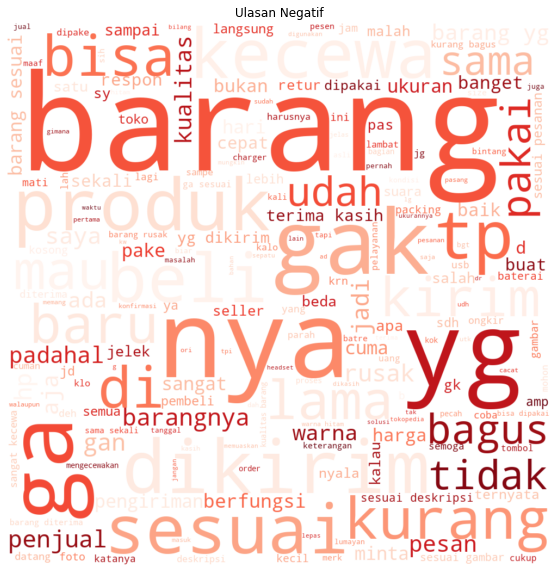

In [ ]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ulasan Negatif")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
train_s1 = df_copy[df_copy["label"] == 1]

In [ ]:
train_s1["Ulasan"] = train_s1["Ulasan"].fillna("Tidak ada komentar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train_s1.head()

,Unnamed: 0.1,Ulasan,Rating,Kategori,Nama Produk,Id Produk,Terjual,Id_Toko,Url,label
0,1,barang sesuai pesanan cepat,5,pertukangan,Staples Dekorasi Staples Kayu + Refill 8mm - S...,418660637,1,1740837,https://www.tokopedia.com/shakaonline87/staple...,1
1,2,barang bagus harga murah,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...,1
2,3,paket rapi...mantap....cepat....sampe tujuan,5,pertukangan,STAPLE GUN ATS 3 WAY TACKER - STAPLES JOK TEMB...,416032545,11,1477109,https://www.tokopedia.com/juraganperkakas/stap...,1
3,4,saya puas barangnya,5,pertukangan,ALAT STAPLES TEMBAK &#40;AIR NAILER GUN&#41; O...,102279869,5,771395,https://www.tokopedia.com/kamarmesin/alat-stap...,1
4,5,responya luar biasa b mantap,5,pertukangan,Isi Refill Staples Jok Kulit Motor / Staple Gu...,190679689,787,969999,https://www.tokopedia.com/mitrapersada/isi-ref...,1


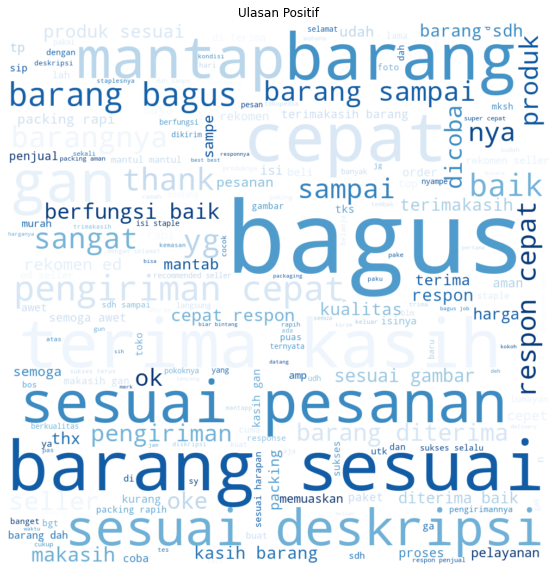

In [ ]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode="RGBA", background_color='white').generate(all_text_s1)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

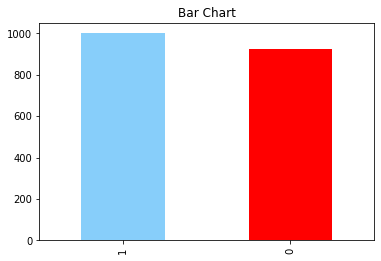

In [ ]:
sentimen_data = pd.value_counts(df_copy["label"], sort=True)
sentimen_data.plot(kind='bar', color=['lightskyblue', 'red'])
plt.title("Bar Chart")
plt.show

## G. Split Data (TF-IDF)

In [ ]:
result['Ulasan'] = result['Ulasan'].fillna("Tidak ada komentar")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(result['Ulasan'], result['label'], 
                                                    test_size=0.1, stratify=result['label'], random_state=30)

In [ ]:
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(1732, 2716)
(193, 2716)


In [ ]:
X_train = X_train.toarray()

In [ ]:
X_test = X_test.toarray()

## H. Machine Learning (Naive Bayes Classifier)

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

cv_method = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=999)

params_NB = {'var_smoothing': np.logspace(0, -9, num=100)}
gscv_nb = GridSearchCV(estimator=nb,
                        param_grid=params_NB,
                        cv = cv_method,
                        verbose = 1, 
                        scoring = 'accuracy')

gscv_nb.fit(X_train, y_train)
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.005336699231206307}

In [ ]:
nb = GaussianNB(var_smoothing=0.005336699231206307)

In [ ]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.005336699231206307)

In [ ]:
y_pred_nb = nb.predict(X_test)

## I. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, roc_curve, plot_roc_curve

In [ ]:
print('----- confusion matrix ------')
print(confusion_matrix(y_test, y_pred_nb))

print('----- classification report -----')
print(classification_report(y_test, y_pred_nb))

----- confusion matrix ------
[[71 22]
 [ 9 91]]
----- classification report -----
              precision    recall  f1-score   support

           0       0.89      0.76      0.82        93
           1       0.81      0.91      0.85       100

    accuracy                           0.84       193
   macro avg       0.85      0.84      0.84       193
weighted avg       0.84      0.84      0.84       193



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


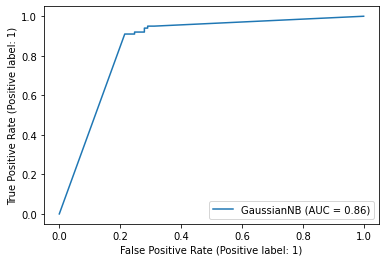

In [ ]:
plot_roc_curve(nb, X_test, y_test)